In [20]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [21]:
os.chdir("C:\QTM")
cd = pd.read_csv('churn_data.csv')

## 1. Basic Information about the Dataset

In [22]:
cd.head()

,Customer_ID,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Churn,Handset,Peak_calls_Sum,...,National_mins,AveNational,All_calls_mins,Usage_Band,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
0,K100010,M,46,18-07-1999,15.066667,1,CAT 50,Churned,SOP10,14,...,58.637756,1.221620,60.081645,Low,-241.362244,11.161790,0.0,0.433167,83.833167,1.395321
1,K100020,M,27,18-09-1997,37.333333,0,CAT 50,Churned,SOP10,54,...,60.590001,0.688523,70.369367,Low,-239.409999,11.508876,0.0,2.933810,86.333810,1.226866
2,K100030,M,39,23-08-1996,50.366667,2,CAT 50,Churned,SOP20,44,...,137.400001,2.050746,154.001093,Low,-162.599999,10.283843,0.0,4.980328,88.380328,0.573894
3,K100040,M,28,18-08-1998,26.200000,2,CAT 50,Churned,SOP10,44,...,137.400000,2.050746,154.001076,Low,-162.600000,10.283843,0.0,4.980323,88.380323,0.573894
4,K100070,M,38,14-10-1999,12.133333,1,CAT 50,Churned,SOP20,68,...,64.394557,0.858594,71.067881,Low,-235.605443,13.753894,0.0,2.001997,85.401997,1.201696


In [23]:
cd.shape

(24999, 31)

In [24]:
list(cd)

['Customer_ID',
 'Gender',
 'Age',
 'Connect_Date',
 'L_O_S',
 'Dropped_Calls',
 'tariff',
 'Churn',
 'Handset',
 'Peak_calls_Sum',
 'Peak_mins_Sum',
 'OffPeak_calls_Sum',
 'OffPeak_mins_Sum',
 'Weekend_calls_Sum',
 'Weekend_mins_Sum',
 'International_mins_Sum',
 'Nat_call_cost_Sum',
 'AvePeak',
 'AveOffPeak',
 'AveWeekend',
 'National_calls',
 'National_mins',
 'AveNational',
 'All_calls_mins',
 'Usage_Band',
 'Mins_charge',
 'call_cost_per_min',
 'actual_call_cost',
 'Total_call_cost',
 'Total_Cost',
 'average_cost_min']

In [25]:
cd.dtypes

Customer_ID                object
Gender                     object
Age                         int64
Connect_Date               object
L_O_S                     float64
Dropped_Calls               int64
tariff                     object
Churn                      object
Handset                    object
Peak_calls_Sum              int64
Peak_mins_Sum             float64
OffPeak_calls_Sum           int64
OffPeak_mins_Sum          float64
Weekend_calls_Sum           int64
Weekend_mins_Sum          float64
International_mins_Sum    float64
Nat_call_cost_Sum         float64
AvePeak                   float64
AveOffPeak                float64
AveWeekend                float64
National_calls              int64
National_mins             float64
AveNational               float64
All_calls_mins            float64
Usage_Band                 object
Mins_charge               float64
call_cost_per_min         float64
actual_call_cost          float64
Total_call_cost           float64
Total_Cost    

## 2. Summary statistics for numerical and categorical features.

In [26]:
# Descriptive Statistics for Numerical Features 
cd.describe()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,National_calls,National_mins,AveNational,All_calls_mins,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,...,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24981.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,30.348774,33.301165,2.443538,244.262090,724.225398,96.467099,288.708725,15.693348,47.152261,189.433267,...,356.422537,1060.086384,4.156837,1249.519651,97.575883,10.238101,20.923311,81.173701,194.973415,0.223113
std,12.835550,14.255039,3.023947,244.695578,518.814193,93.471359,194.779293,16.380505,35.875937,148.829137,...,266.150656,569.277973,3.938587,677.806441,462.974996,2.120988,29.222683,63.784636,86.560715,1.606291
min,12.000000,9.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1749.600000,2.000000,0.000000,0.000000,59.940000,0.064074
25%,20.000000,20.533333,0.000000,57.000000,327.000000,25.000000,132.600000,4.000000,20.000000,73.157046,...,156.000000,642.200000,2.205000,755.725219,-118.500000,8.661073,0.000000,36.497065,131.330678,0.143628
50%,28.000000,33.266667,1.000000,168.000000,632.400001,67.000000,258.000000,10.000000,40.200000,157.531943,...,292.000000,981.300000,2.950000,1149.740260,90.000000,9.639399,9.208732,67.116331,180.898005,0.160725
75%,38.000000,45.666667,2.000000,355.000000,1035.600000,141.000000,415.800000,22.000000,68.499999,268.658402,...,486.000000,1409.999999,4.517320,1663.879089,312.900000,11.915609,32.681981,107.901938,244.775245,0.184736
max,82.000000,58.200000,15.000000,1725.000000,2893.800001,647.000000,1146.000000,124.000000,205.000000,1014.818532,...,2014.000000,3550.800000,58.840909,4191.360148,2350.800000,25.000000,202.490395,474.433782,624.433782,59.940000


In [27]:
# Descriptive Statistics for Categorical Features
cd.describe(include=['object', 'category'])

,Customer_ID,Gender,Connect_Date,tariff,Churn,Handset,Usage_Band
count,24999,24999,24999,24999,24999,24999,24999
unique,24999,2,1372,5,2,10,4
top,K100010,F,08-07-1999,CAT 200,Active,S50,Med
freq,1,12523,42,11072,13933,5978,22437


## 3. Missing value detection and imputation strategies

### a) Detecting missing values

#### Check for missing values in each column

In [28]:
# Missing Values Count
print(cd.isnull().sum())

Customer_ID                0
Gender                     0
Age                        0
Connect_Date               0
L_O_S                      0
Dropped_Calls              0
tariff                     0
Churn                      0
Handset                    0
Peak_calls_Sum             0
Peak_mins_Sum              0
OffPeak_calls_Sum          0
OffPeak_mins_Sum           0
Weekend_calls_Sum          0
Weekend_mins_Sum           0
International_mins_Sum     0
Nat_call_cost_Sum          0
AvePeak                    0
AveOffPeak                 0
AveWeekend                 0
National_calls             0
National_mins              0
AveNational                0
All_calls_mins             0
Usage_Band                 0
Mins_charge                0
call_cost_per_min         18
actual_call_cost           0
Total_call_cost            0
Total_Cost                 0
average_cost_min           0
dtype: int64


#### Check percentage of missing values

In [29]:
#Percentage of Missing Values
print(cd.isnull().mean() * 100)

Customer_ID               0.000000
Gender                    0.000000
Age                       0.000000
Connect_Date              0.000000
L_O_S                     0.000000
Dropped_Calls             0.000000
tariff                    0.000000
Churn                     0.000000
Handset                   0.000000
Peak_calls_Sum            0.000000
Peak_mins_Sum             0.000000
OffPeak_calls_Sum         0.000000
OffPeak_mins_Sum          0.000000
Weekend_calls_Sum         0.000000
Weekend_mins_Sum          0.000000
International_mins_Sum    0.000000
Nat_call_cost_Sum         0.000000
AvePeak                   0.000000
AveOffPeak                0.000000
AveWeekend                0.000000
National_calls            0.000000
National_mins             0.000000
AveNational               0.000000
All_calls_mins            0.000000
Usage_Band                0.000000
Mins_charge               0.000000
call_cost_per_min         0.072003
actual_call_cost          0.000000
Total_call_cost     

#### Identifying rows with missing values

In [30]:
#Rows with Missing Values:
cd[cd.isnull().any(axis=1)]

,Customer_ID,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Churn,Handset,Peak_calls_Sum,...,National_mins,AveNational,All_calls_mins,Usage_Band,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
73,K100940,M,42,05-01-1996,58.066667,5,Play 100,Churned,SOP10,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
74,K100950,M,38,04-01-1998,33.733333,1,Play 100,Churned,SOP10,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
81,K101050,M,38,02-01-1998,33.800000,2,Play 100,Churned,SOP10,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11155,K212470,M,12,01-10-1997,36.900000,2,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11180,K212790,M,22,05-02-1997,44.833333,2,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11181,K212820,F,22,08-08-1998,26.533333,5,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11204,K213130,M,22,27-05-1999,16.800000,2,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11218,K213350,F,16,10-07-1999,15.333333,9,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11222,K213400,M,19,26-07-1996,51.300000,2,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94
11227,K213450,M,20,24-09-1996,49.300000,7,Play 100,Churned,CAS30,0,...,0.0,0.0,0.0,Non,-600.0,NaN,0.0,0.0,59.94,59.94


### b) Imputation Strategies for Missing Data

#### Mean Imputation (for continuous data)

In [31]:
cd['call_cost_per_min'].fillna(cd['call_cost_per_min'].mean(), inplace=True)

In [32]:
print(cd.isnull().sum())

Customer_ID               0
Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Churn                     0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National_mins             0
AveNational               0
All_calls_mins            0
Usage_Band                0
Mins_charge               0
call_cost_per_min         0
actual_call_cost          0
Total_call_cost           0
Total_Cost                0
average_cost_min          0
dtype: int64


## 4. Outlier Identification and Imputation Strategies

### a) Detecting Outliers

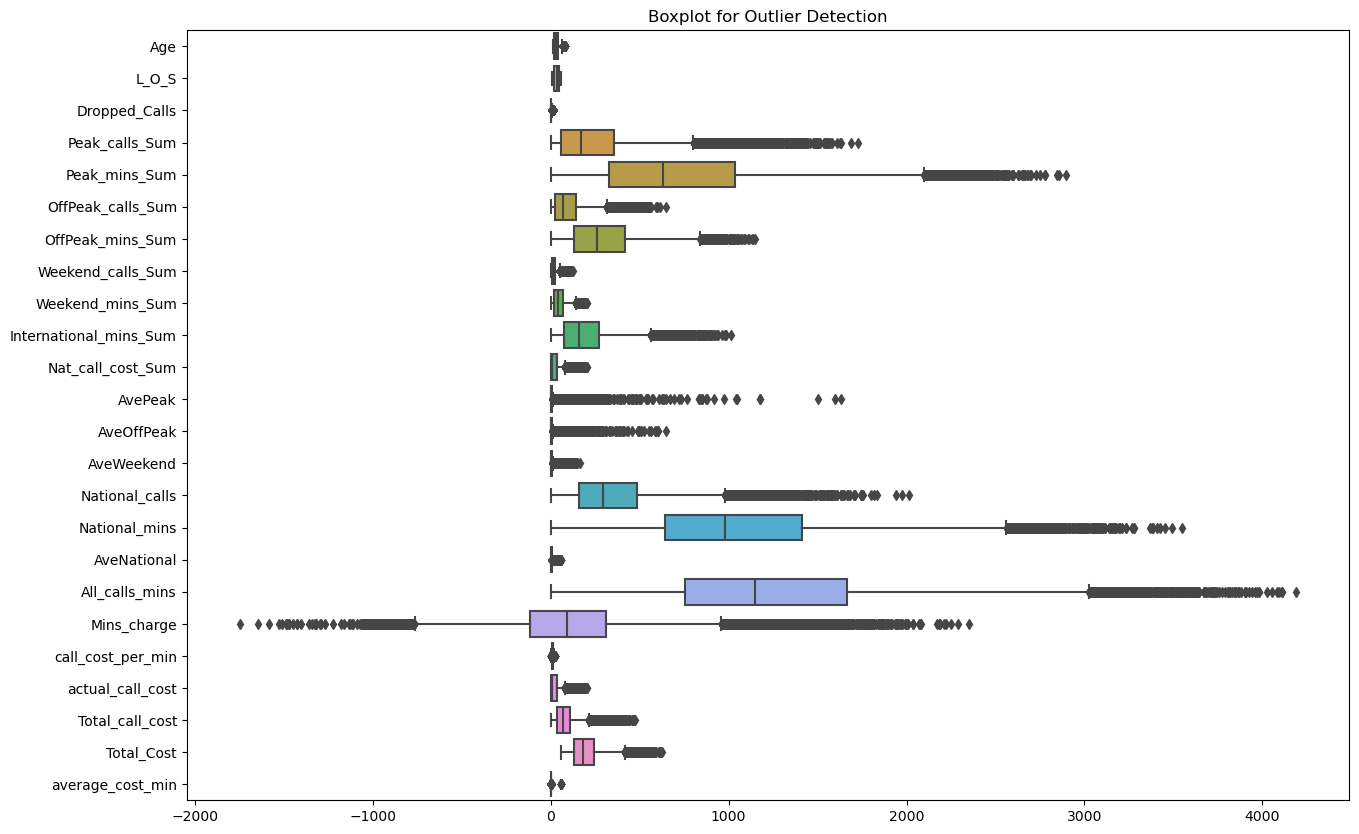

In [33]:
# 1. Boxplot to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=cd, orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

### b) Imputing strategies for Outlier

In [34]:
iqr_report = {}

In [36]:
for column in cd.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = cd[column].quantile(0.25)
    Q3 = cd[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_report[column] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': Q1 - 1.5 * IQR,
        'Upper Bound': Q3 + 1.5 * IQR}

In [37]:
iqr_report_df = pd.DataFrame.from_dict(iqr_report, orient='index')
iqr_report_df

,Q1,Q3,IQR,Lower Bound,Upper Bound
Age,20.000000,38.000000,18.000000,-7.000000,65.000000
L_O_S,20.533333,45.666667,25.133334,-17.166668,83.366668
Dropped_Calls,0.000000,2.000000,2.000000,-3.000000,5.000000
Peak_calls_Sum,57.000000,355.000000,298.000000,-390.000000,802.000000
Peak_mins_Sum,327.000000,1035.600000,708.600000,-735.900000,2098.500000
OffPeak_calls_Sum,25.000000,141.000000,116.000000,-149.000000,315.000000
OffPeak_mins_Sum,132.600000,415.800000,283.200000,-292.200000,840.600000
Weekend_calls_Sum,4.000000,22.000000,18.000000,-23.000000,49.000000
Weekend_mins_Sum,20.000000,68.499999,48.499999,-52.749999,141.249998
International_mins_Sum,73.157046,268.658402,195.501356,-220.094988,561.910436


## 5.Calculation of Percentile

In [39]:
numerical_columns = cd.select_dtypes(include=['float64', 'int64'])

In [40]:
percentiles = [0.01, 0.05, 0.1, 0.9, 0.95, 0.99]
percentile_values = numerical_columns.quantile(percentiles)

In [41]:
print("Percentiles (1%, 5%, 10%, 90%, 95%, 99%) for each numerical column:")
percentile_values

Percentiles (1%, 5%, 10%, 90%, 95%, 99%) for each numerical column:


,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,National_calls,National_mins,AveNational,All_calls_mins,Mins_charge,call_cost_per_min,actual_call_cost,Total_call_cost,Total_Cost,average_cost_min
0.01,12.0,10.000000,0.0,1.0,25.196174,0.00,0.000000,0.0,0.000000,2.392614,...,26.0,94.787393,1.567757,108.924424,-1010.204001,5.184881,0.000000,1.520925,62.715631,0.105354
0.05,14.0,12.000000,0.0,10.0,66.000000,4.00,33.299999,0.0,0.000000,13.170585,...,57.0,254.700001,1.731231,294.038924,-806.820000,7.651644,0.000000,7.230712,76.125350,0.120795
0.10,16.0,13.900000,0.0,20.0,106.199999,8.00,55.439999,1.0,4.800000,26.327947,...,85.0,381.000001,1.858795,440.216047,-438.300000,8.005781,0.000000,14.855949,92.279557,0.128241
0.90,49.0,53.166667,8.0,579.0,1439.399999,231.00,570.599999,38.0,99.000000,396.164782,...,720.0,1833.600000,7.409598,2177.265831,631.760002,13.286409,55.903395,163.820987,312.068722,0.224817
0.95,55.0,55.733333,10.0,742.0,1705.200000,288.00,645.930000,50.0,116.500001,477.774350,...,881.1,2110.230000,10.451925,2493.004526,910.230000,13.844939,81.018031,206.472962,356.109133,0.280768
0.99,66.0,57.733333,11.0,1078.0,2353.200000,404.02,805.812000,73.0,147.600000,651.545891,...,1234.0,2673.042000,20.812477,3189.129620,1473.042000,14.678866,137.505273,304.593358,454.593358,0.666799


## 6. Calculation of co-variance

In [42]:
co_of_var = numerical_columns.std() / numerical_columns.mean()
co_of_var

Age                       0.422935
L_O_S                     0.428064
Dropped_Calls             1.237528
Peak_calls_Sum            1.001775
Peak_mins_Sum             0.716371
OffPeak_calls_Sum         0.968945
OffPeak_mins_Sum          0.674657
Weekend_calls_Sum         1.043787
Weekend_mins_Sum          0.760853
International_mins_Sum    0.785655
Nat_call_cost_Sum         1.388793
AvePeak                   4.300286
AveOffPeak                2.993255
AveWeekend                1.684362
National_calls            0.746728
National_mins             0.537011
AveNational               0.947496
All_calls_mins            0.542454
Mins_charge               4.744769
call_cost_per_min         0.207092
actual_call_cost          1.396657
Total_call_cost           0.785780
Total_Cost                0.443962
average_cost_min          7.199441
dtype: float64

In [45]:
import numpy as np
def cap_outliers(cd, lower_percentile=0.01, upper_percentile=0.99):
    for column in cd.select_dtypes(include=[np.number]):  # Process only numeric columns
        lower_limit = cd[column].quantile(lower_percentile)
        upper_limit = cd[column].quantile(upper_percentile)
        cd[column] = np.clip(cd[column], lower_limit, upper_limit)
    return cd

# Apply the capping
cd_capped = cap_outliers(cd)

print("Capped DataFrame:")
print(cd_capped)

Capped DataFrame:
      Customer_ID Gender  Age Connect_Date      L_O_S  Dropped_Calls   tariff  \
0         K100010      M   46   18-07-1999  15.066667              1   CAT 50   
1         K100020      M   27   18-09-1997  37.333333              0   CAT 50   
2         K100030      M   39   23-08-1996  50.366667              2   CAT 50   
3         K100040      M   28   18-08-1998  26.200000              2   CAT 50   
4         K100070      M   38   14-10-1999  12.133333              1   CAT 50   
...           ...    ...  ...          ...        ...            ...      ...   
24994     K356720      M   49   08-04-1997  42.766667              0  CAT 200   
24995     K356730      F   22   13-07-1998  27.400000              0  CAT 200   
24996     K356740      M   13   03-06-1998  28.733333              7  CAT 200   
24997     K356750      M   58   23-06-1999  15.900000              0  CAT 200   
24998     K356760      F   17   13-11-1999  11.133333              2  CAT 200   

         